In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
datapath = './Data/data.csv'
data = pd.read_csv(datapath, sep=',',header=None).to_numpy()
x = data[:,:-1]
y = data[:,-1]
print(len(x))

43835


In [14]:
def evaluate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    accuracy = clf.score(x_test, y_test)
    return roc_auc, accuracy

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [16]:
rf = RandomForestClassifier(n_estimators=4000, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=4000, n_jobs=-1, random_state=42)

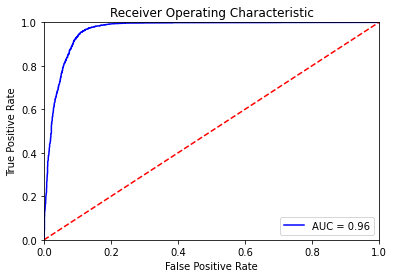

In [18]:
probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
roc_auc, accuracy = evaluate(rf, x_test, y_test)
print(f'ROC-AUC: {round(roc_auc*100, 5)}% and accuracy: {round(accuracy*100,5)}% on test dataset')


ROC-AUC: 92.16648% and accuracy: 92.6323% on test dataset
